What are you trying to achieve?
Think of the problem and the data, check the description and get familiarized to the domain. 

This would be the time you look at the data description, check what columns you have, what types of values.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

# import dataframe from csv file
df = pd.read_csv("data/eda_housing_market.csv")

# CLIENT PROFILE
* Name: Charles Christensen 
* Type: Seller
* Goals: Invest with big returns, wondering about renovation, which neighborhood, Timing

# DATA VISUALIZATION

In [15]:
# show first 5 rows of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [16]:
# check for missing data
df.isnull().sum()

house_id            0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [17]:
# the columns with missing data are: waterfront, view, yr_renovated, sqft_basement
# how many values are missing in each column in percentage
df.isnull().sum() / len(df) * 100

house_id          0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.070982
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     2.092883
yr_built          0.000000
yr_renovated     17.817289
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

# DATA OVERVIEW

* The summary table suggests potential outliers in certain columns, based on high mean and max values.
* The average house price in King County is approximately $540,000.
* The maximum house price in King County is $7.7 million, which is significantly above the mean and median.
* Some houses have 0.5 bathrooms, which requires further investigation.
* There's a house with an unusually high number of 33 bedrooms.
* On average, the houses in the dataset were built in the year 1975.
* yr_renovated has a minimum value of 0, which suggests that some houses have never been renovated.
* The average house has 1.5 floors.
* The average house has 2.1 bathrooms.
* The average house has 3 bedrooms.
* yr_built has a minimum value of 1900, which suggests that some houses are very old.
* yr_renovated has not the correct data format

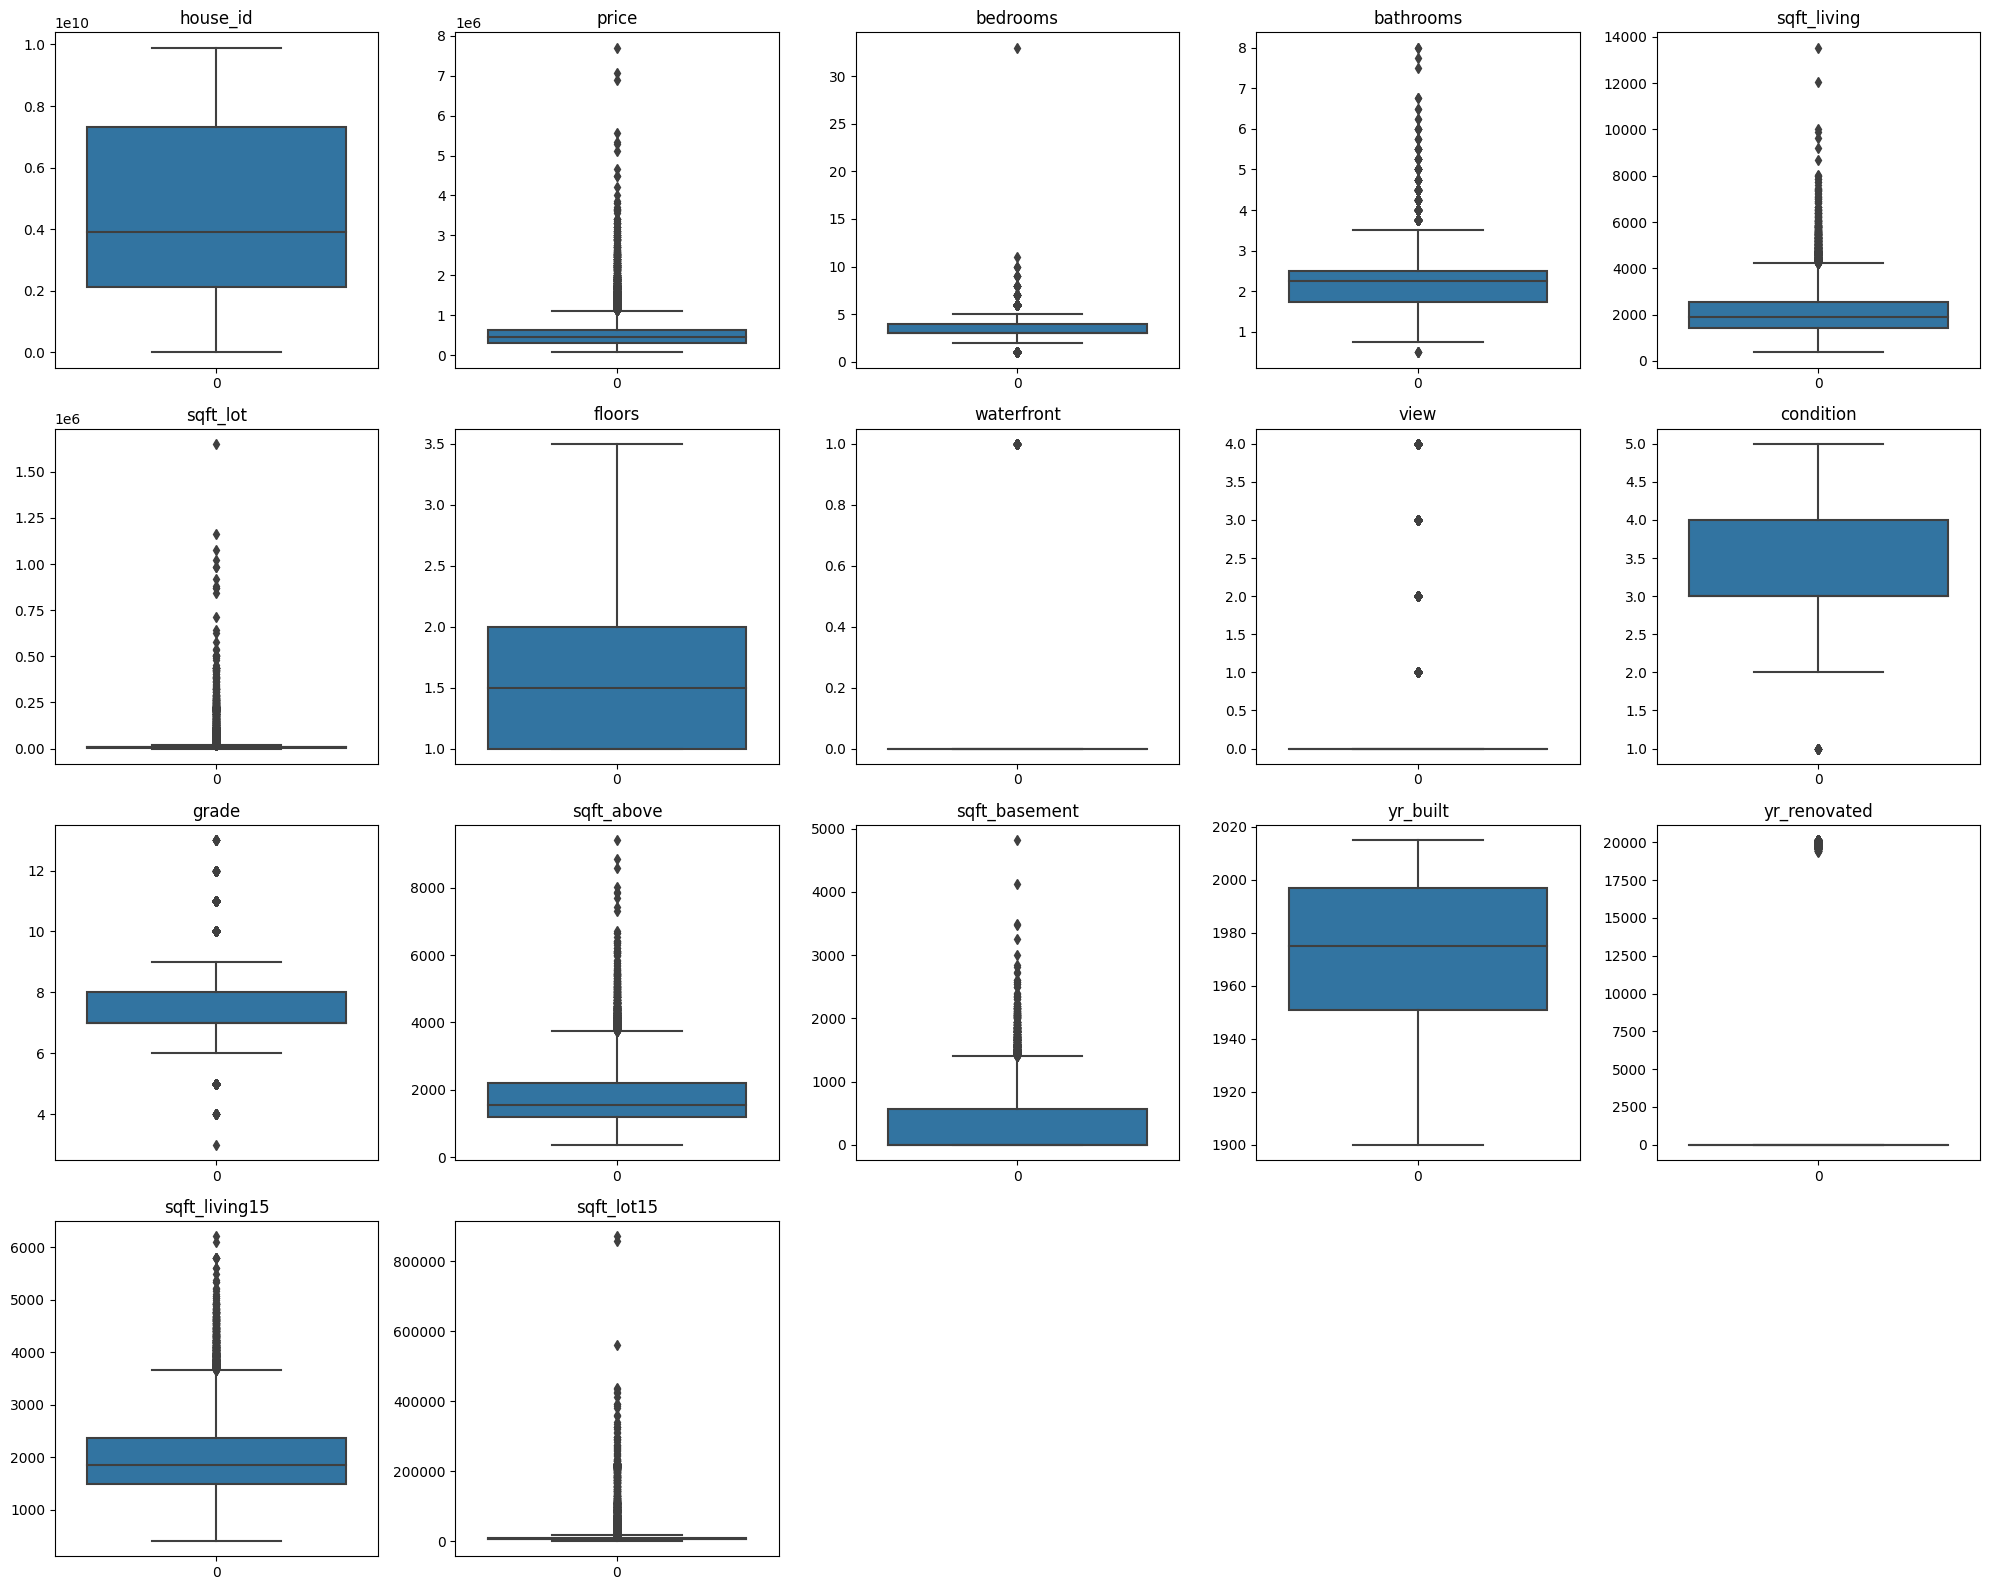

In [18]:
# CHECK FOR OUTLIERS


"""
This code creates a set of box plots to visualize the distribution of numeric columns in the DataFrame. 
It excludes non-numeric columns ('date', 'lat', 'long', 'zipcode') and arranges the plots in a grid layout with a maximum of 5 columns per row. 
Each box plot displays the distribution of values in a numeric column, helping to identify potential outliers and overall data spread.
"""


# Select numeric columns excluding specified columns
numeric_columns = [
    col for col in df.columns if col not in ["date", "lat", "long", "zipcode"]
]
num_columns = len(numeric_columns)

# Calculate the number of rows and columns for the subplot layout
num_rows = (
    num_columns - 1
) // 5 + 1  # Adjust the number of rows based on the number of columns
num_cols = min(num_columns, 5)  # Limit the number of columns to 5

plt.figure(
    figsize=(20, 4 * num_rows)
)  # Adjust the figure height based on the number of rows

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df[column])
    plt.title(column)  # Set the title as the column name

plt.tight_layout()
plt.show()

In [19]:
# SHOW THE PRICE AREAS ON THE MAP

"""
This code uses the Folium library to create a map with circles placed at the latitude and longitude coordinates of each data point. 
The circles are color-coded based on the price ranges defined using 'price_group' column. 
Each circle's radius and color represent different price ranges, and a tooltip displays the price value when hovering over a circle. 
The map provides a visual representation of price areas across the region.
"""


import folium

bin_price = [0, 250000, 500000, 750000, 1000000, 2000000, df["price"].max()]
label_price = [
    "upto 250k",
    "upto 500k",
    "upto 750k",
    "upto 1mil",
    "upto 2mil",
    "more than 2 mil",
]

df["price_group"] = pd.cut(df["price"], bins=bin_price, labels=label_price)
df.head()

Washington_map = folium.Map(location=[47.5, -122.2], zoom_start=10)

price_colors = {
    "upto 250k": "red",
    "upto 500k": "purple",
    "upto 750k": "orange",
    "upto 1mil": "black",
    "upto 2mil": "blue",
    "more than 2 mil": "green",
}

for group, color in price_colors.items():
    df_group = df[df["price_group"] == group]
    for index, row in df_group.sample(n=100).iterrows():
        folium.CircleMarker(
            location=[row["lat"], row["long"]],
            radius=5,  # You can adjust the radius of the dot
            tooltip=f"Price: {row['price']}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=1,
        ).add_to(Washington_map)


Washington_map

# the more expensive houses are located in the city center and around the lake
# the cheaper ones are located in the suburbs

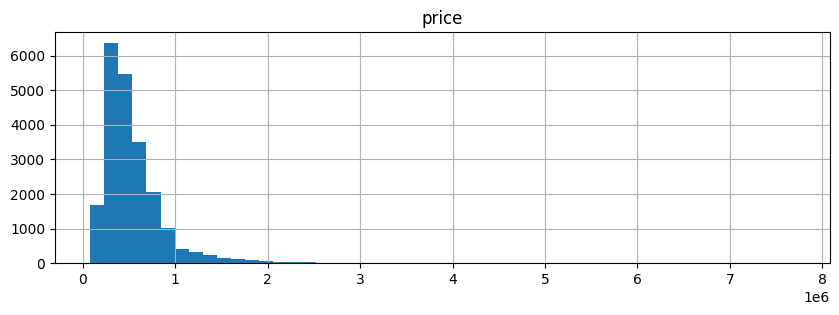

In [20]:
# CHECK FOR DISTRIBUTION OF PRICE

df.hist(column="price", bins=50, figsize=(10, 3))
plt.show()

# not normal distribution

# DATA CLEANING

In [21]:
# checking the datatype and number of nulls and rows
df.info()

# Round the 'bathrooms' values to the nearest integer
df["bathrooms"] = df["bathrooms"].round().astype(int)

# Round the 'bathrooms' values to the nearest integer
df["bedrooms"] = df["bedrooms"].round().astype(int)

# fill waterfront nulls with 0
df["waterfront"] = df["waterfront"].fillna(0)
df["waterfront"] = df["waterfront"].round().astype(int)

df["view"] = df["view"].fillna(0)
df["view"] = df["view"].round().astype(int)
df["view"].unique()

# Fill missing values with 0
df["yr_renovated"] = df["yr_renovated"].fillna(0)
# Extract the first four characters to get the year as a string
df["yr_renovated"] = df["yr_renovated"].astype(str).str[:4]
# Convert string values to integers while handling non-integer values
df["yr_renovated"] = (
    pd.to_numeric(df["yr_renovated"], errors="coerce").fillna(0).astype(int)
)

df["yr_renovated"].unique()

df["yr_built"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   house_id       21597 non-null  int64   
 1   date           21597 non-null  object  
 2   price          21597 non-null  float64 
 3   bedrooms       21597 non-null  float64 
 4   bathrooms      21597 non-null  float64 
 5   sqft_living    21597 non-null  float64 
 6   sqft_lot       21597 non-null  float64 
 7   floors         21597 non-null  float64 
 8   waterfront     19206 non-null  float64 
 9   view           21534 non-null  float64 
 10  condition      21597 non-null  int64   
 11  grade          21597 non-null  int64   
 12  sqft_above     21597 non-null  float64 
 13  sqft_basement  21145 non-null  float64 
 14  yr_built       21597 non-null  int64   
 15  yr_renovated   17749 non-null  float64 
 16  zipcode        21597 non-null  int64   
 17  lat            21597 non-null  

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

# DATA EXPLORING

* show all the sales and find out the returns
* show the zipcodes with a return of 25% or more
* check if it makes sense to invest in these zipcodes (look for similiar properties, that are not sold)
* check if it would make sense to renovate the properties
* check for seasonal trends for BUY and SELL Timing

In [22]:
# SHOW ALL SALES AND FIND OUT THE RETURNS

"""
This code calculates the price difference percentage for each house by grouping the DataFrame by 'house_id'. 
For each group, it sorts the data by date, extracts the purchase and sale dates, calculates the price difference as a percentage, checks if the house was renovated, and stores the results in the dates_df DataFrame. 
The results are displayed showing information about the house's purchase and sale dates, zip code, price difference percentage, and whether it was renovated. 
It also filters and displays the renovated houses. 
The analysis reveals that only 4 out of the houses were renovated.
"""

# Convert the 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Group the DataFrame by 'house_id'
grouped = df.groupby("house_id")

# Initialize empty lists to store results
house_ids = []
date_bought = []
date_sold = []
zipcodes = []
price_difference_percent = []
renovated = []

# Iterate through each group
for house_id, group_df in grouped:
    # Only consider groups with more than one entry
    if len(group_df) > 1:
        # Sort the group data by date
        sorted_group = group_df.sort_values("date")

        # Extract the first and last dates
        first_date = sorted_group.iloc[0]["date"]
        last_date = sorted_group.iloc[-1]["date"]

        # Get the unique zipcode for the house_id
        zipcode = sorted_group.iloc[0]["zipcode"]

        # Calculate the price difference as a percentage
        price_purchase = sorted_group.iloc[0]["price"]
        price_sold = sorted_group.iloc[-1]["price"]
        price_diff_percent = ((price_sold - price_purchase) / price_purchase) * 100

        # Check if the house was renovated
        was_renovated = sorted_group["yr_renovated"].max() > 0

        # Append to lists
        house_ids.append(house_id)
        date_bought.append(first_date)
        date_sold.append(last_date)
        zipcodes.append(zipcode)
        price_difference_percent.append(price_diff_percent)
        renovated.append(was_renovated)

# Create a new DataFrame with the extracted data
dates_df = pd.DataFrame(
    {
        "house_id": house_ids,
        "date_bought": date_bought,
        "date_sold": date_sold,
        "zipcode": zipcodes,
        "price_difference_percent": price_difference_percent,
        "renovated": renovated,
    }
)

# Sort the DataFrame by price_difference_percent in descending order
dates_df = dates_df.sort_values(by="price_difference_percent", ascending=False)

# Display the results
print(
    dates_df[
        [
            "house_id",
            "date_bought",
            "date_sold",
            "zipcode",
            "price_difference_percent",
            "renovated",
        ]
    ]
)

# show renovated houses
dates_df[dates_df["renovated"] == True]
# as you can already see, only 4 houses are renovated



       house_id date_bought  date_sold  zipcode  price_difference_percent  \
46   2023049218  2014-07-16 2015-03-16    98148                321.800948   
126  7129304540  2014-12-20 2015-05-14    98118                230.827068   
73   3333002450  2014-07-08 2015-01-22    98118                196.969697   
53   2422049104  2014-09-15 2014-12-30    98032                176.470588   
83   3883800011  2014-11-05 2015-04-08    98146                168.170732   
..          ...         ...        ...      ...                       ...   
58   2619920170  2014-10-01 2014-12-19    98033                 -0.970874   
63   2767603612  2014-05-12 2015-01-13    98107                 -2.200000   
159  8682262400  2014-07-18 2015-05-13    98053                 -2.337209   
61   2726049071  2014-12-11 2015-04-08    98125                 -3.931373   
127  7167000040  2014-08-13 2015-03-05    98010                 -5.405405   

     renovated  
46       False  
126      False  
73       False  
53     

,house_id,date_bought,date_sold,zipcode,price_difference_percent,renovated
161,8820903380,2014-07-28,2015-01-02,98125,61.504425,True
34,1721801010,2014-09-03,2015-04-24,98146,34.266667,True
133,7520000520,2014-09-05,2015-03-11,98146,3.663793,True
39,1825069031,2014-08-14,2014-10-16,98074,0.000000,True


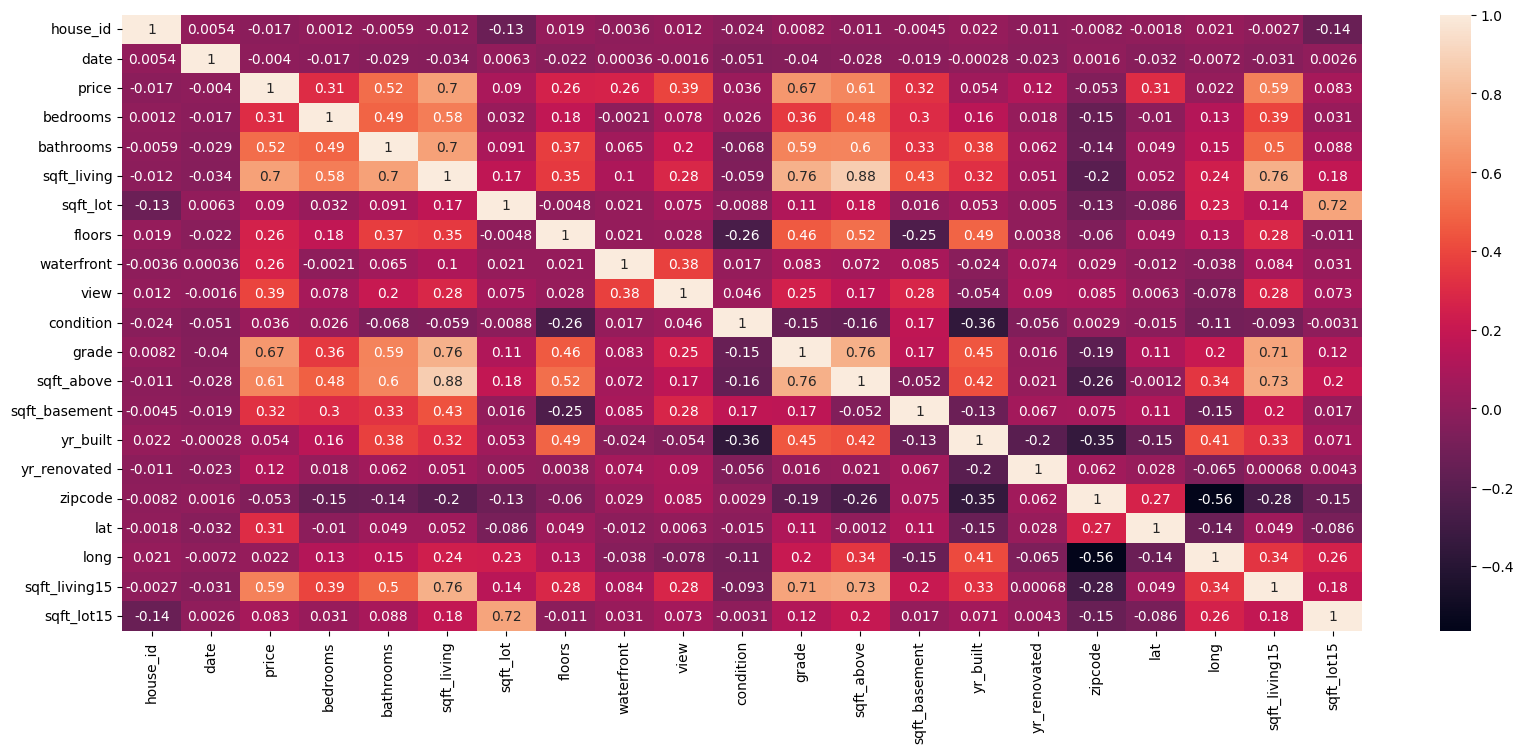

In [23]:
# CHECK FOR CORRELATION BETWEEN FEATURES
# Helps to find similar houses

# Drop the binned 'price_group' column from the DataFrame
correlation_df = df.drop(columns=["price_group"])

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_df.corr(), annot=True)
plt.show()

In [24]:
# columns ordered from the higest posisve correlation to the lowest
correlation = df.drop(columns=["price_group"]).corr()
correlation["price"].sort_values(ascending=False)[1:]

sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.519628
view             0.393497
sqft_basement    0.324905
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022037
date            -0.003998
house_id        -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [25]:
# CHECK THE FEATURES OF THE HOUSE
# FEATURES WITH HIGH CORRELATION
# GET PRICE AVERAGE


"""
The provided code filters properties with a return higher than 25%, finds similar properties in the same zipcode for each high-return property, 
calculates median attributes (such as bedrooms, bathrooms, square footage, condition, and grade) for these similar properties in each zipcode, 
computes the median return and median sale price for each zipcode, and displays the summary statistics of these results. 
The purpose is to analyze and compare property attributes, returns, and sale prices in zipcodes with significant returns.
"""

# Step 1: Filter properties with a return higher than 25%
high_return_properties = dates_df[dates_df["price_difference_percent"] > 25]

# Step 2: Iterate through each property and find similar properties in the same zipcode
similar_properties = []
for index, row in high_return_properties.iterrows():
    house_id = row["house_id"]
    zipcode = row["zipcode"]

    # Filter properties in the same zipcode
    similar_in_zipcode = df[df["zipcode"] == zipcode]

    # Filter properties with similar attributes
    similar_properties.append(similar_in_zipcode)

# Combine similar properties into a single DataFrame
similar_properties_df = pd.concat(similar_properties)

# Step 3: Analyze the attributes of similar properties
# For example, calculate average values for bedrooms, bathrooms, square footage, condition, grade, etc.
avg_attributes = similar_properties_df.groupby("zipcode")[
    ["bedrooms", "bathrooms", "sqft_living", "condition", "grade"]
].median()

# Step 4: Calculate average return for each zipcode
avg_returns = dates_df.groupby("zipcode")["price_difference_percent"].median()

# Step 5: Calculate average sale price for each zipcode
avg_sale_prices = df.groupby("zipcode")["price"].median()

# Display the average attributes, average return, and average sale price for each zipcode
analysis_results = avg_attributes.join(
    [avg_returns, avg_sale_prices.rename("price_average")]
)
print(analysis_results)

analysis_results.describe().median()

         bedrooms  bathrooms  sqft_living  condition  grade  \
zipcode                                                       
98001         3.0        2.0       1824.0        3.0    7.0   
98002         3.0        2.0       1570.0        4.0    7.0   
98003         3.0        2.0       1780.0        3.0    7.0   
98006         4.0        2.0       2720.0        4.0    9.0   
98007         4.0        2.0       2090.0        4.0    8.0   
98011         3.0        2.0       2200.0        3.0    8.0   
98023         3.0        2.0       1880.0        3.0    7.0   
98024         3.0        2.0       1960.0        3.0    7.0   
98028         3.0        2.0       2070.0        3.0    7.0   
98030         3.0        2.0       1868.5        3.0    7.0   
98031         3.0        2.0       1840.0        3.0    7.0   
98032         3.0        2.0       1720.0        4.0    7.0   
98034         3.0        2.0       1840.0        3.0    7.0   
98038         3.0        2.0       2000.0        3.0   

bedrooms                         3.00
bathrooms                        2.00
sqft_living                   1723.25
condition                        3.00
grade                            7.00
price_difference_percent        53.50
price_average               339875.00
dtype: float64

In [26]:
# LOOK FOR SIMILIAR HOUSES (NOT SOLD) WITH SAME FEATURES AND SAME ZIPCODES
# PRICE < 340000, TO FIND UNDERVALUED HOUSES

"""
The code filters houses for sale based on specific criteria such as having 3 bedrooms, 2 bathrooms, square footage greater than 1555, condition above 3, grade above 6, and price below 340000. 
It then filters these houses by zip codes with returns higher than 25% and calculates the average sale price for each zipcode. 
The results display the selected houses' details alongside the average sale price for their respective zip codes.
"""


# Step 1: Filter houses for sale (house_id appears only 1 time)
houses_for_sale = df.groupby("house_id").filter(lambda x: len(x) == 1)

# Step 2: Define the criteria
criteria = (
    (houses_for_sale["bedrooms"] == 3)
    & (houses_for_sale["bathrooms"] == 2)
    & (houses_for_sale["sqft_living"] > 1555)
    & (houses_for_sale["condition"] >= 3)
    & (houses_for_sale["grade"] >= 6)
    & (houses_for_sale["price"] < 340000)
)

# Step 3: Apply the criteria and filter by zipcodes with return > 25%
filtered_houses = houses_for_sale[criteria]
high_return_zipcodes = dates_df[dates_df["price_difference_percent"] > 25]["zipcode"]
filtered_houses = filtered_houses[filtered_houses["zipcode"].isin(high_return_zipcodes)]

# Step 4: Calculate the average sale price for each zipcode
avg_sale_prices = df.groupby("zipcode")["price"].mean()

# Display the results including the price_average for each zipcode
analysis_results = filtered_houses.join([avg_sale_prices.rename("price_average")])
print(analysis_results)

           house_id       date     price  bedrooms  bathrooms  sqft_living  \
6      1.321400e+09 2014-06-27  257500.0       3.0        2.0       1715.0   
9      3.793500e+09 2015-03-12  323000.0       3.0        2.0       1890.0   
24     3.814700e+09 2014-11-20  329000.0       3.0        2.0       2450.0   
25     1.202000e+09 2014-11-03  233000.0       3.0        2.0       1710.0   
57     2.799801e+09 2015-04-07  301000.0       3.0        2.0       2420.0   
...             ...        ...       ...       ...        ...          ...   
21420  1.608000e+09 2015-02-02  255000.0       3.0        2.0       2555.0   
21435  7.140701e+09 2015-03-12  239950.0       3.0        2.0       1600.0   
21510  1.760651e+09 2015-04-28  290000.0       3.0        2.0       1610.0   
21533  1.220000e+09 2014-12-31  327500.0       3.0        2.0       1820.0   
21569  3.832051e+09 2014-08-28  270000.0       3.0        2.0       1870.0   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  

In [27]:
# RENOVATION OR NOT?

# Filter the dates_df DataFrame to show only renovated houses
renovated_dates_df = dates_df[dates_df["renovated"]]

# Display the results for renovated houses
print(renovated_dates_df)

# only 4 houses have been renovated

       house_id date_bought  date_sold  zipcode  price_difference_percent  \
161  8820903380  2014-07-28 2015-01-02    98125                 61.504425   
34   1721801010  2014-09-03 2015-04-24    98146                 34.266667   
133  7520000520  2014-09-05 2015-03-11    98146                  3.663793   
39   1825069031  2014-08-14 2014-10-16    98074                  0.000000   

     renovated  
161       True  
34        True  
133       True  
39        True  


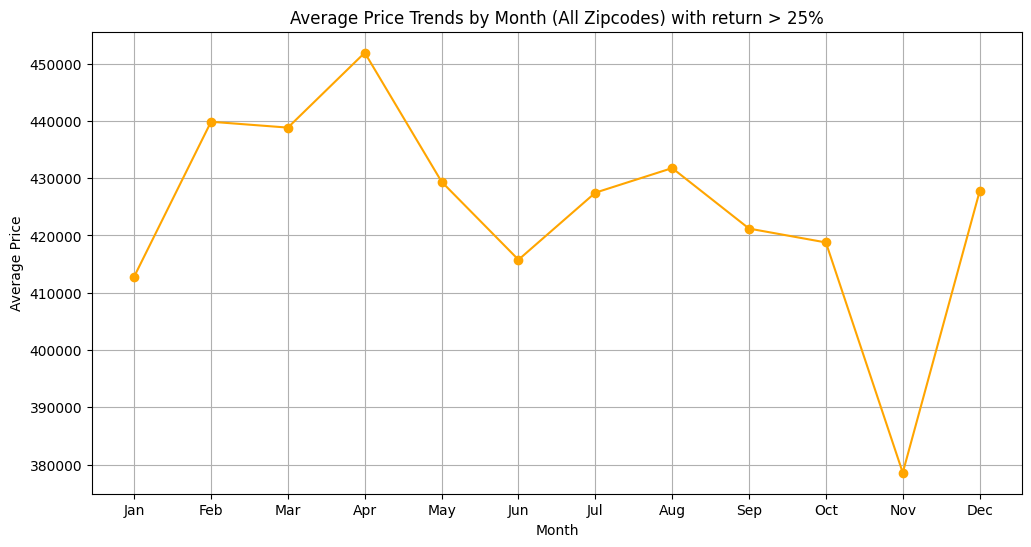

     zipcode  month          price
0      98001      1  278641.000000
1      98001      2  292197.368421
2      98001      3  266789.947368
3      98001      4  335833.774194
4      98001      5  253686.219512
..       ...    ...            ...
558    98199      8  826836.466667
559    98199      9  883140.000000
560    98199     10  814247.129032
561    98199     11  662598.000000
562    98199     12  743899.250000

[563 rows x 3 columns]


In [28]:
# CHECK FOR BEST TIMING TO BUY AND SELL HOUSES IN KING COUNTY, WA
# DATA FROM ALL PRICES IN KING COUNTY, WA FROM 2014-2015

"""
The code converts the 'date' column to datetime format, extracts the year and month from the 'date' column, and filters zip codes with returns greater than 25%. 
It calculates average prices by month for the selected high-return zip codes and visualizes the average price trends over the months using a line plot. 
Additionally, the code displays the DataFrame containing average prices by zipcode and month.
"""


# Convert the 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Extract year and month from the 'date' column
df["month"] = df["date"].dt.month

# Filter zipcodes with more than 25% return
high_return_zipcodes = dates_df[dates_df["price_difference_percent"] > 25]["zipcode"]

# Calculate average prices by month for selected zipcodes with return > 25%
avg_prices_by_zipcode_month = (
    df[df["zipcode"].isin(high_return_zipcodes)]
    .groupby(["zipcode", "month"])["price"]
    .mean()
    .reset_index()
)

# Calculate the average of the sum of all zipcodes
avg_sum_prices = avg_prices_by_zipcode_month.groupby("month")["price"].median()

# Visualize the average of the sum of all zipcodes by month
plt.figure(figsize=(12, 6))
plt.plot(avg_sum_prices.index, avg_sum_prices.values, marker="o", color="orange")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Average Price Trends by Month (All Zipcodes) with return > 25%")
plt.xticks(
    range(1, 13),
    labels=[
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.grid(True)
plt.show()

# Display the average prices by zipcode and month DataFrame
print(avg_prices_by_zipcode_month)


# now we can find the best time to buy and sell houses in King County, WA

In [29]:
# HOW LONG DOES IT TAKE TO SELL A HOUSE? FOR BETTER TIMING OF THE MARKET
# IN ZIPS WITH > 25% RETURN

"""
This code calculates the time it takes to sell a house by subtracting the "date_bought" from the "date_sold" columns in the DataFrame "dates_df". 
It then calculates the median time to sell for zipcodes with a return greater than 25% and prints the result as "Average Time to Sell for Zipcodes with > 25% Return: {average_time:.2f} days". 
This information helps in understanding the timing of the market in zipcodes with high returns.
"""

# Calculate the time to sell for each house
dates_df["days_to_sell"] = (dates_df["date_sold"] - dates_df["date_bought"]).dt.days

# Calculate the average time to sell for zipcodes with > 25% return
avg_time_to_sell = dates_df[dates_df["price_difference_percent"] > 25][
    "days_to_sell"
].median()

# Print the result
print(
    f"Average Time to Sell for Zipcodes with > 25% Return: {avg_time_to_sell:.2f} days"
)

Average Time to Sell for Zipcodes with > 25% Return: 174.50 days


In [34]:
# SHOW UNDERVALUED HOUSES ON A MAP
# WITH PRICE UNDER THE AVERAGE PRICE OF THE ZIPCODE with > 25% RETURN ON INVESTMENT

"""
This code creates a Folium map centered around the mean latitude and longitude of the data. It defines price ranges and corresponding colors for markers on the map. 
For each filtered house in the "analysis_results" DataFrame, it adds a marker with a custom dot icon that represents the house's price range. 
The map displays house markers with their associated popup content.
"""

# Create a map centered around the mean latitude and longitude of the data
mean_latitude = df["lat"].mean()
mean_longitude = df["long"].mean()
map_center = [mean_latitude, mean_longitude]
m = folium.Map(location=map_center, zoom_start=10)

# Define the price ranges and corresponding colors
price_ranges = [
    (0, 230000, "yellowgreen"),
    (230000, 280000, "lime"),
    (280000, 320000, "green"),
    (320000, float("inf"), "red"),
]

# Add markers for each filtered house
for index, row in analysis_results.iterrows():
    price = row["price"]
    popup_content = f"House ID: {row['house_id']}<br>Price: {price:.2f}<br>Average Price in Zipcode: {row['price_average']:.2f}"

    # Determine the icon color based on the price range
    for low, high, color in price_ranges:
        if low <= price < high:
            icon_color = color
            break

    # Create a custom dot icon
    icon = folium.DivIcon(
        html=f'<div style="background-color: {icon_color}; width: 10px; height: 10px; border-radius: 50%;"></div>'
    )

    folium.Marker(
        location=[row["lat"], row["long"]], popup=popup_content, icon=icon
    ).add_to(m)

# Display the map
m

In [31]:
# WHY ARE PEOPLE NOT RENOVATING THEIR HOUSES?
# IN ZIPCODES WITH > 25% RETURN, THE AVERAGE AGE OF HOUSES IS 40 YEARS OLD

"""
This code aims to understand why people might not be renovating their houses in zipcodes with over 25% return. 
It does this by calculating the average age of houses for each zipcode that meets the return criteria. 
It filters zipcodes with a return greater than 25%, merges the filtered data with the main dataset, calculates the average age of properties for each zipcode, and displays the results.
"""


# Step 1: Filter zipcodes with return > 25%
high_return_zipcodes = dates_df[dates_df["price_difference_percent"] > 25]["zipcode"]

# Step 2: Merge with df to get yr_built information
merged_df = pd.merge(df, high_return_zipcodes, on="zipcode", how="inner")

# Step 3: Calculate average age of properties for each zipcode
avg_age_by_zipcode = (
    pd.to_datetime("today").year - merged_df.groupby("zipcode")["yr_built"].mean()
).astype(int)

# Display the average age of houses in zipcodes with > 25% return
print(avg_age_by_zipcode)


# why not to renovate them and sell them for a higher price?

zipcode
98001    42
98002    55
98003    46
98006    44
98007    51
98011    40
98023    44
98024    51
98028    45
98030    38
98031    41
98032    57
98034    46
98038    27
98042    36
98045    37
98052    37
98053    25
98055    53
98056    45
98058    44
98059    34
98070    55
98072    41
98074    33
98103    69
98106    57
98108    65
98115    74
98116    69
98117    74
98118    72
98122    73
98125    63
98126    70
98133    59
98144    67
98146    67
98148    59
98155    61
98166    65
98168    70
98177    62
98178    67
98188    57
98198    56
98199    66
Name: yr_built, dtype: int64


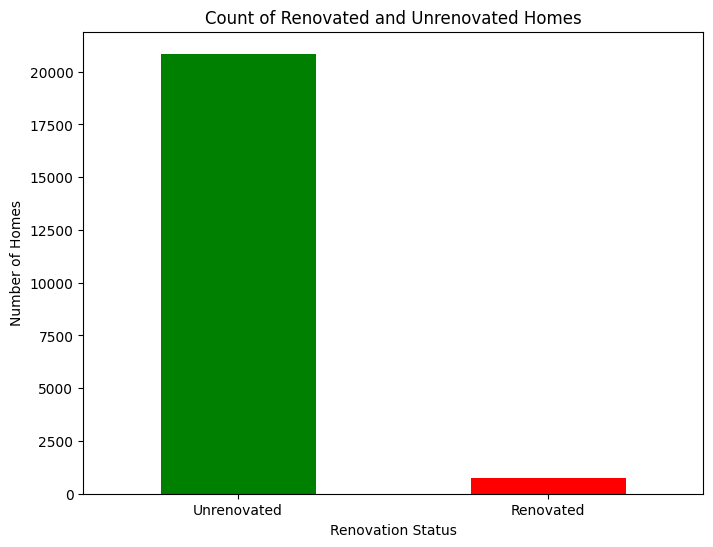

In [32]:
# COUNT FOR ALL ZIPCODES


"""
This code counts the number of renovated and unrenovated homes and creates a bar chart to visualize the distribution. 
The x-axis represents the renovation status (Renovated or Unrenovated), and the y-axis represents the number of homes. 
The resulting chart helps visualize the distribution of renovated and unrenovated homes in the dataset.
"""

# Count the number of renovated and unrenovated homes
renovated_count = (
    df["yr_renovated"]
    .apply(lambda x: "Renovated" if x > 0 else "Unrenovated")
    .value_counts()
)

# Create a bar chart
plt.figure(figsize=(8, 6))
renovated_count.plot(kind="bar", color=["green", "red"])
plt.xlabel("Renovation Status")
plt.ylabel("Number of Homes")
plt.title("Count of Renovated and Unrenovated Homes")
plt.xticks(rotation=0)
plt.show()

In [39]:
# COMPARE THE PRICE OF NEWER HOUSES WITH OLDER HOUSES WITH SAME FEATURES

'''
This code sets a threshold year and filters houses based on specific conditions (number of bedrooms, bathrooms, square footage, condition, and grade). 
It then separates the houses into newer and older categories based on the year built in relation to the threshold. 
The code calculates and compares the average prices of newer and older houses that meet the given conditions, highlighting the price difference between the two categories.
'''


# Define the threshold year for categorization
threshold_year = 2010

# Filter houses based on conditions
filtered_houses = df[
    (df["bedrooms"] == 3)
    & (df["bathrooms"] == 2)
    & (df["sqft_living"] > 1555)
    & (df["condition"] >= 3)
    & (df["grade"] >= 6)
]

# Filter newer and older houses
newer_houses = filtered_houses[filtered_houses["yr_built"] >= threshold_year]
older_houses = filtered_houses[filtered_houses["yr_built"] < threshold_year]

# Calculate average prices
avg_price_newer = newer_houses["price"].median()
avg_price_older = older_houses["price"].median()

# Calculate price difference
price_difference = avg_price_newer - avg_price_older

print(f"Average Price of Newer Houses (Meeting Conditions): ${avg_price_newer:.2f}")
print(f"Average Price of Older Houses (Meeting Conditions): ${avg_price_older:.2f}")
print(f"Price Difference: ${price_difference:.2f}")

# to as the result: it would make no sense to renovate the house, because the price difference is negative and people pay more for older houses

Average Price of Newer Houses (Meeting Conditions): $428500.00
Average Price of Older Houses (Meeting Conditions): $475000.00
Price Difference: $-46500.00
